[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.1  Szenarien stündlich aufgelöst




FLUCCOplus Setup

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
import sys
sys.path.append("..\\")
sys.path
from FLUCCOplus.notebooks import *



FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


### Scenario Überblick
Zuerst werden alle Szenarien aus Excel eingelesen und dargestellt

In [4]:
import FLUCCOplus.scenarios as scens

In [5]:
sc = scens.all()
print(*[i+k for i,k in zip([i for i in sc.index], ["\n"]*len(sc.index))])

EM2018
 EM2019
 E-Control 2019
 Energie und Klimazukunft 2030 (Veigl17)
 Erneuerbare Energie 2030 (UBA16)
 WEM 2030 (UBA17)
 Transition 2030 (UBA17)
 Energie und Klimazukunft 2050 (Veigl17)
 Erneuerbare Energie 2050 (UBA16)
 WEM 2050 (UBA17)
 Transition 2050 (UBA17)
 100% Erneuerbare Deckung 2050 (FLUCCO+)
 100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)
 100% Erneuerbare Deckung 2050 ohne Speicherausbau (FLUCCO+)



c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


## Creating a Scenario object



In [6]:
from FLUCCOplus.scenarios import Scenario
 

### EM Base data
Select an electricity map year


In [7]:
em_year = 2018 # 2015, 2016, 2017, 2018

Select an available Scenario ``name`` 

In [8]:
#name = "EM2018"
#name = "EM2019"                                                  
#name = "E-Control 2019"                                          
#name = "Energie und Klimazukunft 2030 (Veigl17)"                 
#name = "Erneuerbare Energie 2030 (UBA16)"                        
#name = "WEM 2030 (UBA17)"                                        
#name = "Transition 2030 (UBA17)"                                 
#name = "Energie und Klimazukunft 2050 (Veigl17)"                
#name = "Erneuerbare Energie 2050 (UBA16)"                        
#name = "WEM 2050 (UBA17)"                                       
name = "Transition 2050 (UBA17)"                                 
#name = "100% Erneuerbare Deckung 2050 (FLUCCO+)"                 
#name = "100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)" 

Create the scenario

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


KeyError: 'Erzeugung'

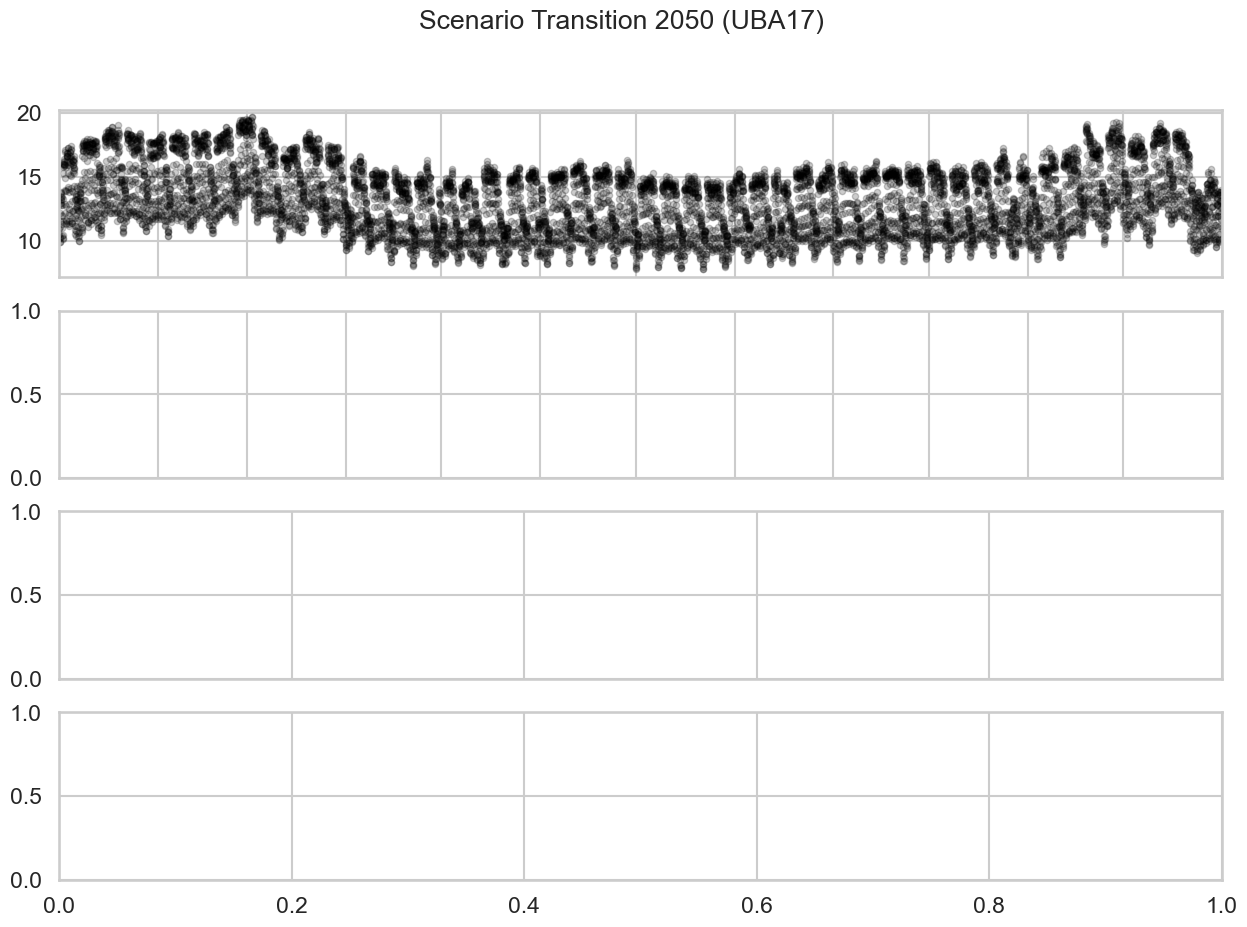

In [9]:
import FLUCCOplus.electricitymap as elmap

s = Scenario(  
    name = name, # can be anything
    scenario = name, # must be a scenario name
    em_base = {"year": em_year,
               "df": elmap.fetch(year=em_year)})
s
s.plot()

In [ ]:
from FLUCCOplus.electricitymap import *

df_em = np.genfromtxt("../data/raw/electricityMap/Electricity_map_2015-2019.csv", delimiter=";")

In [ ]:
# Ich bräuchte den "target"-Wert. Wie schaffe ich ihn raus???
target_value = 115805.56482

## Stunde-Skalierung

Über acht 3-stündliche Werte wird ein spezifische Tagesverlauf generiert und für das ganze Jahr ...

array([1.275     , 1.13583918, 0.9471227 , ..., 1.025     , 1.00265922,
       1.18478107])

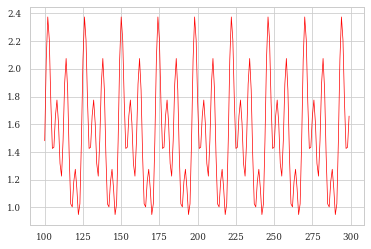

In [ ]:
# apply transform
import FLUCCOplus.transform as traffo
import os

if not os.path.exists("../Data/interim"):
        os.makedirs("../Data/interim")

hscale = 24
p_day = np.array([1.1, 1.2, 2.2, 1.6, 1.6, 1.4, 1.9, 1.2])
day = traffo.transform(p_day, hour_scale=hscale)

x = np.arange(0, hscale, hscale/len(p_day))
xh = np.arange(0,8760,1)

plt.plot(xh[100:300], day[100:300], "r")
plt.plot(x[100:300], p_day[100:300], "bo")

#np.savetxt(config.DATA_INTERIM / Path("tagesverlauf.csv"), day, format("%2.4f"))
day

In [ ]:
day.sum()

13359.0

Über acht Skalierfaktor wird ein "Skalierverlauf" für das ganze Jahr generiert...

array([1.0125    , 0.97181439, 0.94749649, ..., 0.9875    , 1.01410605,
       1.02898252])

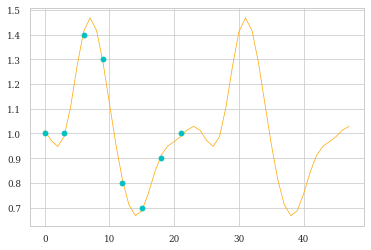

In [ ]:
import numpy as np
p_day_scaler = [1, 1, 1.4, 1.3, 0.8, 0.7, 0.9, 1] # hours are in 3-hour-steps
day_scaler = traffo.transform(p_day_scaler, hour_scale=hscale)


x = np.arange(0, hscale, hscale/len(p_day_scaler))
xh = np.arange(0,8760,1)
plt.plot(xh[:hscale*2], day_scaler[:hscale*2], "orange")
plt.plot(x[:hscale*2], p_day_scaler[:hscale*2], "co")

day_scaler

Der spezifische Jahresverlauf wird mit dem "Skalierverlauf" multipliziert...

In [ ]:
scaled_day = np.multiply(day,day_scaler)
scaled_day

array([1.2909375 , 1.10382487, 0.89739543, ..., 1.0121875 , 1.01680279,
       1.21911901])

In [ ]:
scaled_day.sum()

13849.012499999997

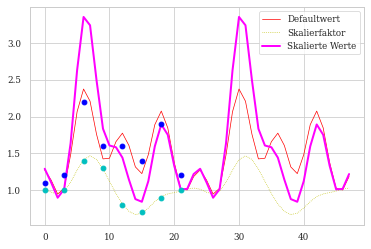

In [ ]:
x = np.arange(0, hscale, hscale/len(p_day_scaler))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*2], day[:hscale*2], "r")

plt.plot(xh[:hscale*2], day_scaler[:hscale*2], "y:")

plt.plot(xh[:hscale*2], scaled_day[:hscale*2], "magenta", linewidth=2.0)
plt.legend(['Defaultwert', 'Skalierfaktor', 'Skalierte Werte'])
plt.plot(x[:hscale*2], p_day[:hscale*2], "bo")
plt.plot(x[:hscale*2], p_day_scaler[:hscale*2], "co")
plt.savefig('../Data/interim/Default_skaliert.png', dpi=300)

Skalierfaktor zu dem Zielwert wird ermittelt...

In [ ]:
scale_factor = target_value / scaled_day.sum()
scale_factor

8.362008830593519

Die 3-stündliche Werte werden hochskaliert...

In [ ]:
p_day_to_target = p_day * scale_factor
p_day_to_target

array([ 9.19820971, 10.0344106 , 18.39641943, 13.37921413, 13.37921413,
       11.70681236, 15.88781678, 10.0344106 ])

und der Jahresverlauf wird durch das Tagesprofil generiert...

<AxesSubplot:>

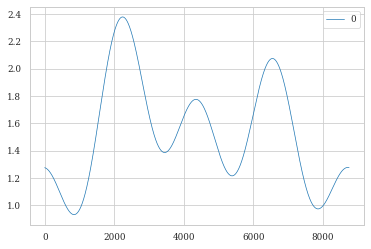

In [ ]:
day_to_target = traffo.transform(p_day, hour_scale=8760)
pd.DataFrame(day_to_target).plot()

174799618.26318118

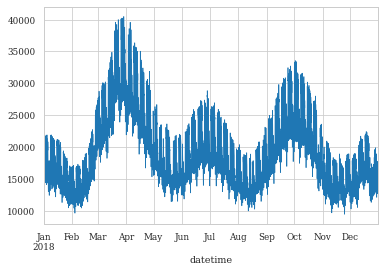

In [ ]:
df_scaled = s.TSD["Strombedarf"] * day_to_target
df_scaled.plot()
df_scaled.sum()

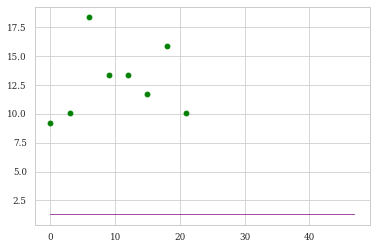

In [ ]:

x = np.arange(0, hscale, hscale/len(p_day_to_target))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*2], day_to_target[:hscale*2], "purple")
plt.plot(x[:hscale*2], p_day_to_target[:hscale*2], "go")

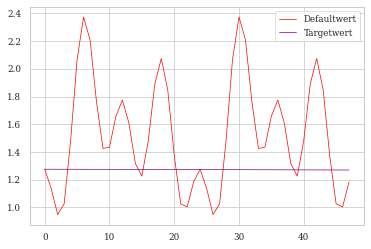

In [ ]:
x = np.arange(0, hscale, hscale/len(p_day_to_target))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*2], day[:hscale*2], "r")
plt.plot(xh[:hscale*2], day_to_target[:hscale*2], "purple")
plt.legend(['Defaultwert', 'Targetwert'])
#plt.plot(x[:hscale*2], p_day[:hscale*2], "bo")
#plt.plot(x[:hscale*2], p_day_to_target[:hscale*2], "go")
plt.savefig('../Data/interim/Default_and_Targetvalue.png', dpi=300)

Der skalierte Jahresverlauf wird mit dem Skalierverlauf multipliziert...

In [ ]:
scaled_day_to_target = np.multiply(day_to_target,day_scaler)
scaled_day_to_target

array([1.2909375 , 1.23898672, 1.20790674, ..., 1.25928453, 1.29313921,
       1.31203184])

In [ ]:
scaled_day_to_target.sum()

13525.987499999997

In [ ]:
target_value

115805.56482

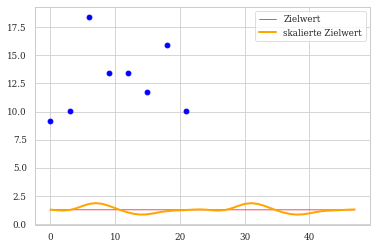

In [ ]:
x = np.arange(0, hscale, hscale/len(p_day_to_target))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*2], day_to_target[:hscale*2], "r")
plt.plot(xh[:hscale*2], scaled_day_to_target[:hscale*2], "orange", linewidth=2.0)

plt.legend(['Zielwert', 'skalierte Zielwert'])
plt.plot(x[:hscale*2], p_day_to_target[:hscale*2], "bo")
plt.savefig('../Data/interim/skalierte_Default_and_Targetvalue.png', dpi=300)

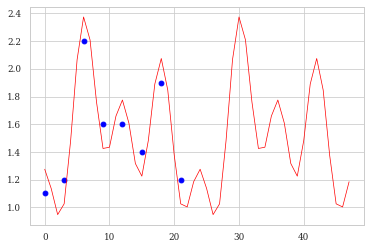

In [ ]:
import panel as pn
import panel.widgets as pnw
from matplotlib.figure import Figure

def scaler_plot(scaler, support_points, hour_scale, view_scale=2):
    """
    scaler: zeitreihe (8760)
    
    """
    p, h = support_points, hour_scale

    x = np.arange(0, h, h/len(p))
    xh = np.arange(0,8760,1)

    fig = Figure()
    ax = fig.add_subplot()
    a, b = 0, int(h*view_scale)
    ax.plot(x[a:b], p[a:b], "bo")
    ax.plot(xh[a:b], scaler[a:b], "r")
    return fig

scaler_plot(day,p_day, 24)

In [ ]:
scaled_day

array([1.2909375 , 1.10382487, 0.89739543, ..., 1.0121875 , 1.01680279,
       1.21911901])

In [ ]:
day

array([1.275     , 1.13583918, 0.9471227 , ..., 1.025     , 1.00265922,
       1.18478107])

In [ ]:
example = traffo.zyklusscaler(day, [10, 10, 14, 13, 8, 7, 9, 10], 12) # funktioniert nur mit ganze Zahlen
example

array([12.75      , 11.35839182, 13.25971777, ...,  9.225     ,
       10.02659221, 13.0325918 ])

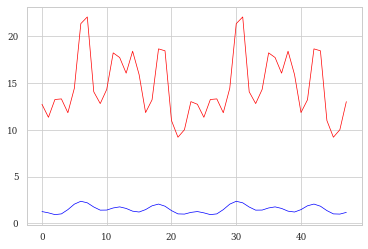

In [ ]:
x = np.arange(0, hscale, hscale/len(p_day_to_target))
xh = np.arange(0,8760,1)
pd.DataFrame(example)
x = np.arange(0, hscale, hscale/len(p_day_to_target))
xh = np.arange(0,8760,1)
plt.plot(xh[:hscale*2], day[:hscale*2], "b")
plt.plot(xh[:hscale*2], example[:hscale*2], "r")

In [ ]:
z=8760
timeseries = np.arange(0,8760, 1)
timeseries_grouped = np.arange(0,8760, 1)
fact = [1,2,3,4,5,6,7,8,9,10,11,12]
fact_up = np.arange(0,8760, 1)
g = int(len(timeseries)/z)
for i in range(len(fact)):
    fact_up[(i * int(z/len(fact))):((i + 1) * int(z/len(fact)))] = fact[i]
for j in range(g-1):
    fact_up[(j+1)*z:((j+2)*z)] = fact_up[0:z]

#for i in range(int(round(len(timeseries)/z))):
 #    timeseries_grouped= timeseries[(i*z):((i+1)*z)]*fact[i]
  #   timeseries_grouped2= timeseries[(i*z):((i+1)*z)]*fact[i-1]
for i in range(len(fact)):
    for j in range(z):
    #timeseries_grouped[i] = timeseries[(i * z):((i + 1) * z)]
    #timeseries_grouped = np.multiply(timeseries[(i*z):((i+1)*z)],fact[i])
        timeseries_grouped[j] = timeseries[j]* fact[i in range(z)]
#timeseries_grouped[i] = timeseries[(i*z):((i+1)*z)]*fact[i]
fact_up
#timeseries_grouped
#timeseries

array([ 1,  1,  1, ..., 12, 12, 12])

In [ ]:
for i in range(len(fact)):
    #for j in range(int(round(len(timeseries)/z))):
        fact_up[(i * int(z/len(fact))):((i + 1) * int(z/len(fact)))] = fact[i]
fact_up

array([ 1,  1,  1, ..., 12, 12, 12])

Row
    [0] Column
        [0] Column
            [0] Markdown(str)
        [1] FloatSlider(end=3.0, step=0.05, value=1.0)
        [2] FloatSlider(end=3.0, step=0.05, value=1.0)
        [3] FloatSlider(end=3.0, step=0.05, value=1.0)
        [4] FloatSlider(end=3.0, step=0.05, value=1.0)
        [5] FloatSlider(end=3.0, step=0.05, value=1.0)
        [6] FloatSlider(end=3.0, step=0.05, value=1.0)
        [7] FloatSlider(end=3.0, step=0.05, value=1.0)
        [8] FloatSlider(end=3.0, step=0.05, value=1.0)
        [9] FloatSlider(end=3.0, step=0.05, value=1.0)
        [10] FloatSlider(end=3.0, step=0.05, value=1.0)
        [11] FloatSlider(end=3.0, step=0.05, value=1.0)
        [12] FloatSlider(end=3.0, step=0.05, value=1.0)
    [1] ParamFunction(function)
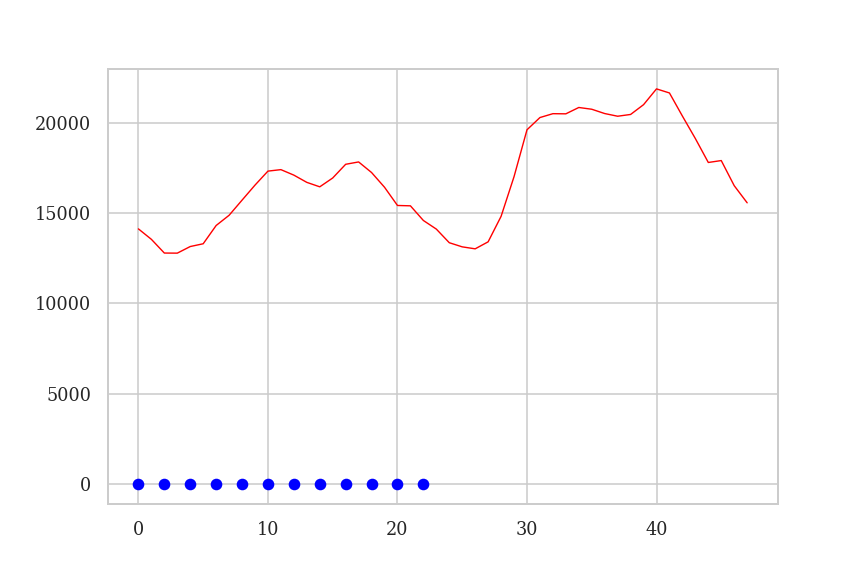

In [ ]:
#params
N = 12 # muss eigentlich anzahl der skalierungswerte sein
zyklus = 24 #h zyklus
timeseries = df_scaled


points = [pnw.FloatSlider(name='', value=1.0, start=0., end=3., step=0.05) for i in range(N)]
#points = np.array(p_day_scaler)
#points = [pnw.FloatSlider(name='', value=1.0, start=0., end=3., step=0.05) for i in range(N)]
@pn.depends(*points)
def reactive_scalar(*points):
    p = np.array(p_day_scaler)
    transformed_timeseries = timeseries * traffo.transform(p)
    return scaler_plot(transformed_timeseries, points, zyklus)

widgets   = pn.Column("<br>\n# Reactive Scaler")
sliders = pn.Column(widgets, *points)
dashboard = pn.Row(sliders, reactive_scalar)

pn.extension()
pn.interact()
dashboard

## Monate-Skalierung

In [ ]:
# scale to fit targetsum

# get load
# apply transform
#     ecars (non dsm)
#
# scale to fit targetsum

# em scenario residual load report